In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#Data Split
from sklearn.model_selection import train_test_split
import pandas as pd

# Supposons que X soit votre DataFrame de caractéristiques et y votre vecteur cible
df = pd.read_csv("Final_Data.csv") 
y = df['isFraud']
X = df.drop(['isFraud'], axis = 1)

# Diviser les données en train (60%), validation (20%) et test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de validation : {X_val.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

print(X_train.iloc[0])

Taille de l'ensemble d'entraînement : (2668422, 5)
Taille de l'ensemble de validation : (889474, 5)
Taille de l'ensemble de test : (889474, 5)
oldbalanceOrg    -0.131805
amount            0.059685
step             -0.063913
newbalanceDest   -0.429132
type             -0.766302
Name: 2070987, dtype: float64


In [6]:
#Modèle Logistic Regression 

from sklearn.linear_model import LogisticRegression 

modele = LogisticRegression(random_state=16)
modele.fit(X_train, y_train)

y_pred = modele.predict(X_val)

Text(0.5, 427.9555555555555, 'Predicted label')

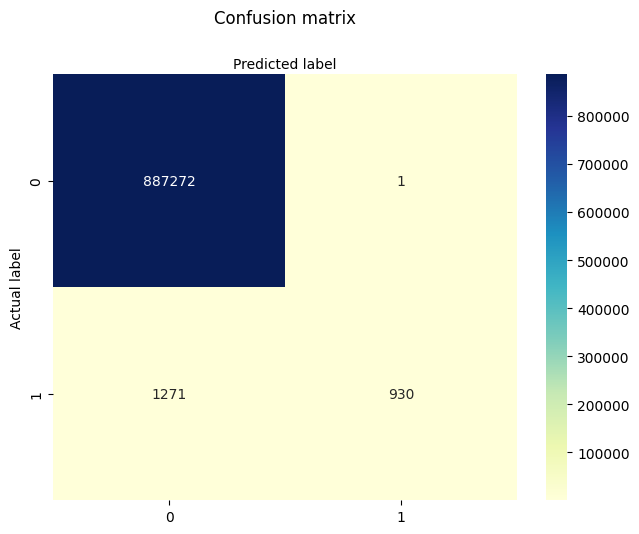

In [7]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
classes = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
# Afficher le rapport de classification

# Calculer le nombre d'erreurs de prédiction
nbr_score_errors = np.sum(y_val != y_pred)
print(f"Nombre d'erreurs de prédiction : {nbr_score_errors}")

# Calculer le score d'exactitude
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print(f"Score d'exactitude : {accuracy_score:.6f}")

#Afficher le rapport de classification 
classification_report = metrics.classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", classification_report)

Nombre d'erreurs de prédiction : 1272
Score d'exactitude : 0.998570
Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    887273
     Class 1       1.00      0.42      0.59      2201

    accuracy                           1.00    889474
   macro avg       1.00      0.71      0.80    889474
weighted avg       1.00      1.00      1.00    889474



In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [11]:
# Calculer le nombre d'erreurs de prédiction
nbr_score_errors = np.sum(y_val != y_pred)
print(f"Nombre d'erreurs de prédiction : {nbr_score_errors}")

# Calculer le score d'exactitude
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print(f"Score d'exactitude : {accuracy_score:.6f}")

#Afficher le rapport de classification 
classification_report = metrics.classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", classification_report)

Nombre d'erreurs de prédiction : 199
Score d'exactitude : 0.999776
Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    887273
     Class 1       0.99      0.92      0.95      2201

    accuracy                           1.00    889474
   macro avg       1.00      0.96      0.98    889474
weighted avg       1.00      1.00      1.00    889474



Text(0.5, 427.9555555555555, 'Predicted label')

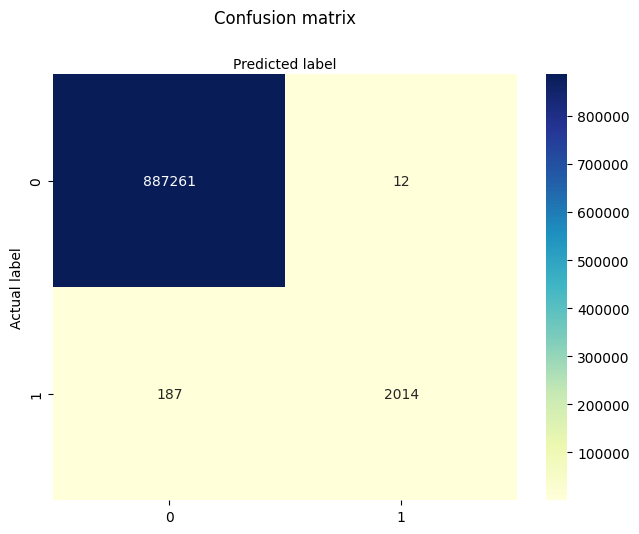

In [12]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
classes = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [13]:
#Isolation Forest
import numpy as np
from sklearn.ensemble import IsolationForest

forest_iso = IsolationForest(max_samples=100, random_state=0)
forest_iso.fit(X_train)
y_pred = forest_iso.predict(X_val)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [14]:
from sklearn import metrics
# Calculer le nombre d'erreurs de prédiction
nbr_score_errors = np.sum(y_val != y_pred)
print(f"Nombre d'erreurs de prédiction : {nbr_score_errors}")

# Calculer le score d'exactitude
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print(f"Score d'exactitude : {accuracy_score:.6f}")

#Afficher le rapport de classification 
classification_report = metrics.classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", classification_report)

Nombre d'erreurs de prédiction : 284727
Score d'exactitude : 0.679893
Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.68      0.81    887273
     Class 1       0.01      0.88      0.01      2201

    accuracy                           0.68    889474
   macro avg       0.50      0.78      0.41    889474
weighted avg       1.00      0.68      0.81    889474



Text(0.5, 427.9555555555555, 'Predicted label')

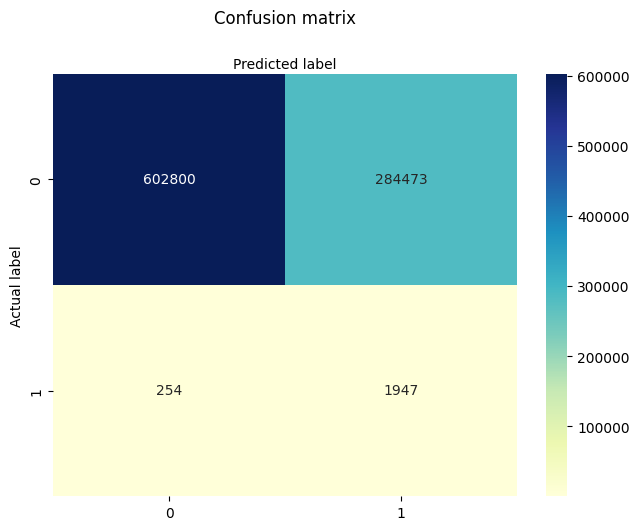

In [15]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
classes = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
from sklearn import metrics
# Calculer le nombre d'erreurs de prédiction
nbr_score_errors = np.sum(y_val != y_pred)
print(f"Nombre d'erreurs de prédiction : {nbr_score_errors}")

# Calculer le score d'exactitude
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print(f"Score d'exactitude : {accuracy_score:.6f}")

#Afficher le rapport de classification 
classification_report = metrics.classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", classification_report)

Nombre d'erreurs de prédiction : 4447
Score d'exactitude : 0.995000
Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    887273
     Class 1       0.00      0.00      0.00      2201

    accuracy                           1.00    889474
   macro avg       0.50      0.50      0.50    889474
weighted avg       1.00      1.00      1.00    889474



Text(0.5, 427.9555555555555, 'Predicted label')

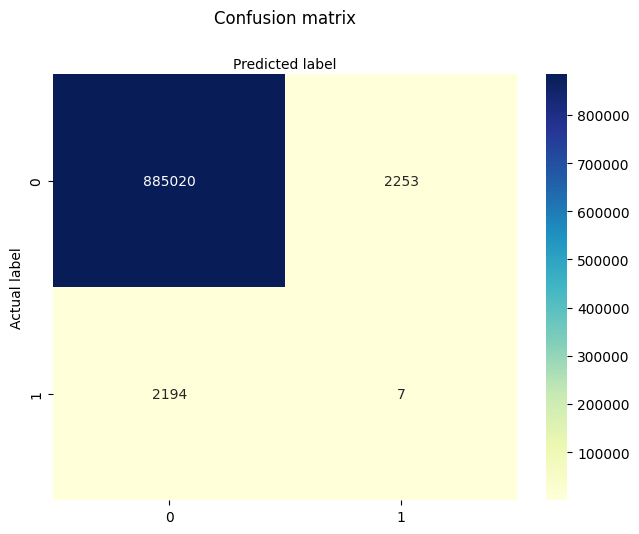

In [19]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
classes = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 


In [22]:
#Random Forest Re entrainement 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.fit(X_test, y_test)
y_pred = rf.predict(X_val)

# Calculer le nombre d'erreurs de prédiction
nbr_score_errors = np.sum(y_val != y_pred)
print(f"Nombre d'erreurs de prédiction : {nbr_score_errors}")

# Calculer le score d'exactitude
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print(f"Score d'exactitude : {accuracy_score:.6f}")

#Afficher le rapport de classification 
classification_report = metrics.classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", classification_report)

Nombre d'erreurs de prédiction : 408
Score d'exactitude : 0.999541
Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    887273
     Class 1       0.99      0.82      0.90      2201

    accuracy                           1.00    889474
   macro avg       0.99      0.91      0.95    889474
weighted avg       1.00      1.00      1.00    889474



Text(0.5, 427.9555555555555, 'Predicted label')

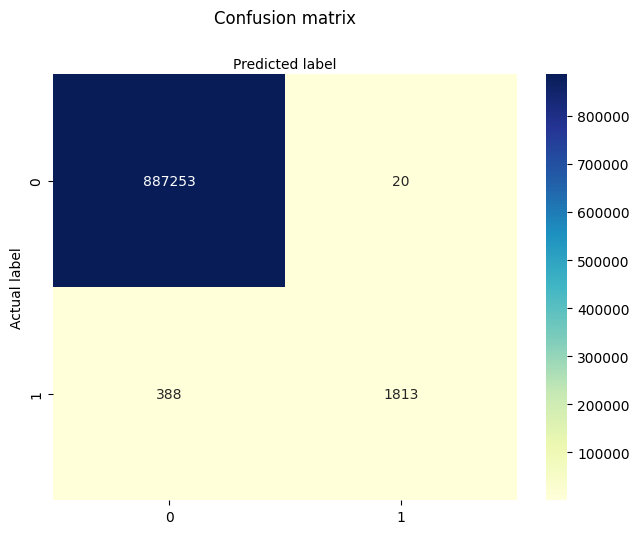

In [23]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
classes = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [26]:
# Exportation du modèle entrainé
import pickle

pkl_filename = "random_forest_model.pkl"
with open(pkl_filename,'wb') as file :
    pickle.dump(rf, file)

In [3]:
import pickle 
import pandas as pd
test = pd.DataFrame({
    "oldbalanceOrg":[-0.18272011121759224],
    "amount":[-0.5788229580578675],
    "step":[-1.7929999954598412],
    "newbalanceDest":[-0.6042255231053274],
    "type":[0.889922262297945]
})
pkl_filename = "random_forest_model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)
    
y_pred = model.predict(test)

print(y_pred)

[0]
